In [23]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error,r2_score,roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from warnings import filterwarnings
%pylab inline
from sklearn.decomposition import PCA
filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
os.getcwd()

'C:\\Users\\HP\\Desktop'

In [24]:
os.chdir('C:\\Users\\HP\\Desktop\\kodluyoruz_ödev2')

In [26]:
df=pd.read_excel("HWdata.xlsx")

In [5]:
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [234]:
df.shape

(6167, 136)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


In [6]:
##df['ind_18'].head().astype(float)

In [238]:
df.describe()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
count,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,...,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000
mean,-0.803146,-0.803470,48.388890,48.289282,0.099609,49.488867,-18.497518,11.771485,11.773550,11.773392,...,0.000224,28.529204,-8.554792,-28.166694,0.490297,0.498188,0.490174,-0.057102,-2.906358,-3.315072
std,23.624403,23.624144,36.388526,36.478009,60.414625,12.198722,68.281120,6.803997,5.786089,4.970499,...,0.005660,26.316896,16.100087,23.271524,0.425376,0.228547,0.150483,14.834497,34.559778,36.841541
min,-131.000000,-131.000000,0.000000,0.000000,-100.000000,12.134540,-625.093855,1.050000,1.660000,2.580000,...,-0.023790,0.000000,-103.800000,-188.000000,0.000000,0.000000,0.083530,-15.780588,-37.142889,-38.573858
25%,-14.000000,-14.000000,14.285714,14.285714,-50.000000,40.868503,-45.687212,6.850000,7.260000,7.635000,...,-0.003230,10.700000,-11.700000,-39.000000,0.000000,0.323783,0.379894,-15.350354,-36.208094,-37.695273
50%,0.000000,0.000000,50.000000,50.000000,0.000000,49.549766,-2.817298,10.550000,11.040000,11.270000,...,-0.000053,21.300000,0.000000,-22.000000,0.473684,0.495192,0.487078,0.000000,-34.267756,-35.788391
75%,13.000000,13.000000,85.714286,85.714286,57.142857,58.504375,28.072613,14.950000,15.040000,14.960000,...,0.003414,38.400000,0.000000,-11.000000,1.000000,0.675730,0.601508,15.385945,35.879524,37.521892
max,76.000000,76.000000,100.000000,100.000000,100.000000,84.821848,81.105847,82.900000,54.240000,37.050000,...,0.023340,281.800000,0.000000,0.000000,1.000000,1.000000,0.868534,15.768767,37.038694,38.465649


In [7]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


(6167, 136)

In [239]:
df.isnull().values.any()

False

In [240]:
df.corr()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
ind_5,1.000000,0.989945,0.543246,-0.533328,0.649225,0.822255,0.768234,-0.014502,-0.026336,-0.041130,...,0.620106,-0.694619,-0.304134,-0.620099,0.076169,0.626439,0.817302,0.060969,0.068989,0.060428
ind_6,0.989945,1.000000,0.514222,-0.495572,0.608947,0.768551,0.713870,-0.006066,-0.019393,-0.035795,...,0.634679,-0.646983,-0.279922,-0.569657,0.021220,0.567359,0.810371,0.062101,0.069652,0.061560
ind_8,0.543246,0.514222,1.000000,-0.374857,0.828650,0.583623,0.482220,0.162635,0.139612,0.038862,...,0.275687,-0.489596,-0.277258,-0.432579,0.144795,0.593799,0.445427,-0.004126,0.006984,-0.006650
ind_9,-0.533328,-0.495572,-0.374857,1.000000,-0.829576,-0.609288,-0.568581,0.238938,0.240048,0.152133,...,-0.276882,0.436275,0.349318,0.505772,-0.173139,-0.631961,-0.450719,-0.031316,-0.004053,0.012093
ind_10,0.649225,0.608947,0.828650,-0.829576,1.000000,0.719409,0.633753,-0.046312,-0.060849,-0.068450,...,0.333229,-0.558311,-0.377913,-0.565931,0.191752,0.739227,0.540428,0.016423,0.006654,-0.011307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ind_426,0.626439,0.567359,0.593799,-0.631961,0.739227,0.776076,0.700736,-0.066201,-0.066437,-0.051049,...,0.293592,-0.571432,-0.356302,-0.594243,0.341017,1.000000,0.584754,0.019599,0.009063,-0.002519
ind_428,0.817302,0.810371,0.445427,-0.450719,0.540428,0.807595,0.727899,0.021970,0.016318,0.010361,...,0.574646,-0.499656,-0.260048,-0.487564,0.188853,0.584754,1.000000,0.047041,0.052418,0.043563
20_target,0.060969,0.062101,-0.004126,-0.031316,0.016423,0.042550,0.041289,0.015320,0.012012,0.026881,...,0.066637,-0.029005,-0.009829,-0.045656,-0.008799,0.019599,0.047041,1.000000,0.384076,0.355950
50_target,0.068989,0.069652,0.006984,-0.004053,0.006654,0.055045,0.048302,0.072728,0.084561,0.101774,...,0.127234,0.008239,0.047728,-0.101488,-0.003372,0.009063,0.052418,0.384076,1.000000,0.940916


In [27]:
df = df.drop(columns=['20_target','90_target'])

In [312]:
df.corr()['50_target'].sort_values(ascending = False)

50_target    1.000000
ind_412      0.127234
ind_18       0.127057
ind_17       0.121097
ind_332      0.104057
               ...   
ind_67      -0.069859
ind_330     -0.075589
ind_26      -0.084275
ind_418     -0.101488
ind_324     -0.110802
Name: 50_target, Length: 131, dtype: float64

In [313]:
df.corr()['50_target'].mean()

0.019789136686827746

In [314]:
df.corr()['50_target'].abs() < 0.01

ind_5        False
ind_6        False
ind_8         True
ind_9         True
ind_10        True
             ...  
ind_418      False
ind_424       True
ind_426       True
ind_428      False
50_target    False
Name: 50_target, Length: 131, dtype: bool

In [315]:
# df.loc[ : , (((df.corr()['50_target'].abs() < 0.01) == True).any(axis = 0))]

In [317]:
#df.corr()['50_target'].abs() > 0.01

In [316]:
#atılacak_sütunlar= list((df.corr()['50_target'].abs() < 0.1).index) 

In [28]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#fnd index of feature columns with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

In [29]:
dfx = df.drop(df[to_drop], axis=1)

In [30]:
df.shape

(6167, 134)

In [31]:
dfx.shape

(6167, 40)

In [32]:
##- değerler olanlar
##min max , scale
for i in dfx:
    if dfx[i].min() > 0:
        print(i)

ind_14
ind_18
ind_40


TypeError: '>' not supported between instances of 'str' and 'int'

In [324]:
dfx.head()

,ind_5,ind_8,ind_9,ind_14,ind_18,ind_27,ind_28,ind_29,ind_40,ind_42,...,ind_334,ind_340,ind_344,ind_349,ind_403,ind_412,ind_416,ind_420,ind_422,50_target
0,19,100.0,85.714286,23.80,9.1100,0.000010,66.666667,93.692449,3,-5,...,-0.000091,-0.319064,0.0,0.0,0.045130,0.002371,-49.6,-152,-353,35.625252
1,24,100.0,78.571429,11.45,9.2225,-0.000191,66.666667,76.694104,3,-6,...,-0.000091,-0.318905,0.0,0.0,0.035314,0.003074,-55.6,-158,-359,35.643013
2,30,100.0,71.428571,8.75,9.3125,-0.000375,66.666667,83.909974,3,-4,...,-0.000091,-0.318831,0.0,0.0,0.005860,0.003561,-58.4,-160,-362,35.651301
3,37,100.0,64.285714,7.80,9.4150,-0.000641,66.666667,98.596644,3,-5,...,-0.000091,-0.318696,0.0,0.0,-0.018252,0.004366,-61.8,-166,-367,0.000000
4,41,100.0,57.142857,14.90,9.8925,-0.000319,66.666667,149.283572,2,-18,...,-0.000091,-0.318155,0.0,0.0,-0.007183,0.004198,-79.8,-186,-388,-35.727079


In [325]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Data columns (total 40 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ind_5      6167 non-null   int64  
 1   ind_8      6167 non-null   float64
 2   ind_9      6167 non-null   float64
 3   ind_14     6167 non-null   float64
 4   ind_18     6167 non-null   float64
 5   ind_27     6167 non-null   float64
 6   ind_28     6167 non-null   float64
 7   ind_29     6167 non-null   float64
 8   ind_40     6167 non-null   int64  
 9   ind_42     6167 non-null   int64  
 10  ind_88     6167 non-null   float64
 11  ind_109    6167 non-null   object 
 12  ind_164    6167 non-null   float64
 13  ind_172    6167 non-null   float64
 14  ind_176    6167 non-null   float64
 15  ind_179    6167 non-null   float64
 16  ind_217    6167 non-null   int64  
 17  ind_225    6167 non-null   float64
 18  ind_228    6167 non-null   float64
 19  ind_237    6167 non-null   float64
 20  ind_239 

In [45]:
dfx.corr()['50_target'].sort_values(ascending = False)

50_target        1.000000
ind_412          0.127234
ind_18           0.127057
ind_310          0.072983
ind_14           0.072728
ind_5            0.068989
ind_309          0.059441
ind_316          0.054812
ind_416          0.047728
ind_239          0.045161
ind_327          0.030440
ind_179          0.020378
ind_225          0.020039
ind_109_RED      0.018466
ind_344          0.016288
ind_172          0.007046
ind_8            0.006984
ind_422          0.002737
ind_88           0.001783
ind_28          -0.002270
ind_9           -0.004053
ind_40          -0.004267
ind_176         -0.004327
ind_403         -0.004338
ind_164         -0.004658
ind_29          -0.009761
ind_42          -0.010329
ind_311         -0.011296
ind_109_GREEN   -0.018466
ind_237         -0.018760
ind_340         -0.020202
ind_217         -0.021112
ind_27          -0.023645
ind_420         -0.028000
ind_349         -0.029205
ind_241         -0.034939
ind_334         -0.044060
ind_315         -0.044727
ind_228     

In [376]:
dfx.shape

(6167, 30)

In [46]:
dfx = dfx.drop(columns=['ind_164','ind_403','ind_176', 'ind_40' , 'ind_9', 'ind_28', 'ind_88', 'ind_422','ind_8','ind_172' ])

In [12]:
dfx.corr()

,ind_5,ind_14,ind_18,ind_27,ind_42,ind_179,ind_217,ind_225,ind_228,ind_237,...,ind_324,ind_327,ind_330,ind_334,ind_340,ind_344,ind_349,ind_412,ind_416,50_target
ind_5,1.000000,-0.014502,0.067261,-0.234211,-0.015664,0.287907,-0.266487,-0.054757,-0.254256,-0.031913,...,-0.409430,0.221351,-0.120103,-0.261901,-0.188912,-0.158690,-0.084647,0.620106,-0.304134,0.068989
ind_14,-0.014502,1.000000,0.238631,0.072443,0.014390,0.081361,-0.029598,0.146402,-0.089800,-0.062672,...,-0.027027,-0.013368,-0.086525,-0.033792,-0.034847,-0.041509,0.000922,-0.001524,0.037185,0.072728
ind_18,0.067261,0.238631,1.000000,0.008946,-0.035120,0.026614,-0.066150,0.320261,-0.131479,-0.127390,...,-0.257567,0.173309,-0.222343,-0.158665,-0.110680,-0.058657,-0.058566,-0.018460,-0.144709,0.127057
ind_27,-0.234211,0.072443,0.008946,1.000000,-0.001624,-0.112423,0.004265,0.069290,0.003254,0.046435,...,0.128401,0.005404,-0.067863,0.015735,-0.014065,0.005918,0.025325,-0.039687,0.117902,-0.023645
ind_42,-0.015664,0.014390,-0.035120,-0.001624,1.000000,0.175452,-0.004839,-0.014255,0.008135,0.019903,...,0.010190,0.004794,0.004507,-0.002687,0.002164,-0.012769,0.002645,-0.010387,0.115770,-0.010329
ind_179,0.287907,0.081361,0.026614,-0.112423,0.175452,1.000000,-0.032978,0.005518,-0.035437,-0.017969,...,-0.041122,0.018555,-0.024459,-0.025483,-0.022160,-0.005696,-0.012385,0.103843,-0.139521,0.020378
ind_217,-0.266487,-0.029598,-0.066150,0.004265,-0.004839,-0.032978,1.000000,-0.050271,0.164802,-0.015416,...,0.135635,-0.102909,0.114272,0.144317,0.091273,0.063435,0.037131,-0.177972,0.089242,-0.021112
ind_225,-0.054757,0.146402,0.320261,0.069290,-0.014255,0.005518,-0.050271,1.000000,0.077022,-0.034317,...,-0.049419,0.085456,-0.348908,-0.127520,-0.104725,-0.072543,-0.019949,-0.056797,-0.031442,0.020039
ind_228,-0.254256,-0.089800,-0.131479,0.003254,0.008135,-0.035437,0.164802,0.077022,1.000000,0.250225,...,0.039471,0.050028,0.185695,0.352489,0.322924,0.303359,0.217584,-0.122074,0.009925,-0.058103
ind_237,-0.031913,-0.062672,-0.127390,0.046435,0.019903,-0.017969,-0.015416,-0.034317,0.250225,1.000000,...,-0.029368,-0.025150,-0.022506,0.051547,0.052394,0.069692,0.047926,-0.043912,0.002269,-0.018760


In [166]:
dfx.corr()

,ind_5,ind_8,ind_9,ind_14,ind_18,ind_27,ind_28,ind_29,ind_40,ind_42,...,ind_330,ind_334,ind_340,ind_344,ind_349,ind_403,ind_412,ind_416,20_target,50_target
ind_5,1.000000,0.543246,-0.533328,-0.014502,0.067261,-0.234211,0.024791,0.128830,-0.370260,-0.015664,...,-0.120103,-0.261901,-0.188912,-0.158690,-0.084647,-0.210083,0.620106,-0.304134,0.060969,0.068989
ind_8,0.543246,1.000000,-0.374857,0.162635,-0.012341,-0.186725,0.076141,0.226854,-0.357995,-0.063779,...,-0.036819,-0.126501,-0.052613,-0.033844,-0.016305,-0.042314,0.275687,-0.277258,-0.004126,0.006984
ind_9,-0.533328,-0.374857,1.000000,0.238938,-0.127658,0.180808,-0.100826,-0.261304,0.357520,0.098828,...,0.074678,0.179988,0.089111,0.082468,0.050046,0.020214,-0.276882,0.349318,-0.031316,-0.004053
ind_14,-0.014502,0.162635,0.238938,1.000000,0.238631,0.072443,-0.012543,-0.030051,0.075241,0.014390,...,-0.086525,-0.033792,-0.034847,-0.041509,0.000922,0.019930,-0.001524,0.037185,0.015320,0.072728
ind_18,0.067261,-0.012341,-0.127658,0.238631,1.000000,0.008946,0.030568,0.053038,-0.061376,-0.035120,...,-0.222343,-0.158665,-0.110680,-0.058657,-0.058566,0.006076,-0.018460,-0.144709,0.037185,0.127057
ind_27,-0.234211,-0.186725,0.180808,0.072443,0.008946,1.000000,-0.025866,-0.068476,0.226422,-0.001624,...,-0.067863,0.015735,-0.014065,0.005918,0.025325,0.200385,-0.039687,0.117902,-0.036967,-0.023645
ind_28,0.024791,0.076141,-0.100826,-0.012543,0.030568,-0.025866,1.000000,0.660605,-0.239159,-0.639881,...,-0.001645,0.006388,-0.004979,0.011397,-0.002296,0.265872,0.004400,-0.102179,-0.019229,-0.002270
ind_29,0.128830,0.226854,-0.261304,-0.030051,0.053038,-0.068476,0.660605,1.000000,-0.387347,-0.597246,...,-0.016327,-0.013588,-0.008490,0.011670,-0.006899,0.497754,0.041273,-0.194735,-0.026587,-0.009761
ind_40,-0.370260,-0.357995,0.357520,0.075241,-0.061376,0.226422,-0.239159,-0.387347,1.000000,0.323721,...,0.012886,0.000296,-0.071768,-0.030415,-0.030826,-0.116531,-0.057675,0.210117,0.007771,-0.004267
ind_42,-0.015664,-0.063779,0.098828,0.014390,-0.035120,-0.001624,-0.639881,-0.597246,0.323721,1.000000,...,0.004507,-0.002687,0.002164,-0.012769,0.002645,-0.307132,-0.010387,0.115770,0.009952,-0.010329


In [33]:
dfx['ind_420'] = dfx['ind_420'].replace('?',np.nan)

In [34]:
dfx['ind_420'].isnull().values.any()

True

In [35]:
dfx['ind_109'].describe()

count      6167
unique        2
top       GREEN
freq       3132
Name: ind_109, dtype: object

In [36]:
dfx['ind_109'].describe()

count      6167
unique        2
top       GREEN
freq       3132
Name: ind_109, dtype: object

In [37]:
dfx['ind_420'].describe()

count    5126.000000
mean       30.055989
std       117.967626
min      -349.000000
25%       -30.000000
50%        35.000000
75%       116.000000
max       297.000000
Name: ind_420, dtype: float64

In [38]:
dfx['ind_420'] = dfx['ind_420'].replace(np.nan, 30)

In [39]:
dfx['ind_420'] = dfx['ind_420'].astype(float)

In [40]:
dfx['ind_422'] = dfx['ind_422'].replace('?',np.nan)
dfx['ind_422'].isnull().values.any()

True

In [41]:
df['ind_109'].unique()

array(['GREEN', 'RED'], dtype=object)

In [42]:
dfx['ind_422'] = dfx['ind_422'].replace(np.nan, -153)

In [43]:
dfx = pd.get_dummies(dfx)

In [48]:
dfx.shape

(6167, 31)

In [ ]:
### dfx['ind_422'] = dfx['ind_422'].astype(float)

In [176]:
#dfx = dfx.drop(columns=['ind_109'])

In [177]:
#dfx = dfx.drop(columns=['20_target'])

In [337]:
dfx.corr()

,ind_5,ind_8,ind_9,ind_14,ind_18,ind_27,ind_28,ind_29,ind_40,ind_42,...,ind_334,ind_340,ind_344,ind_349,ind_403,ind_412,ind_416,ind_420,ind_422,50_target
ind_5,1.000000,0.543246,-0.533328,-0.014502,0.067261,-0.234211,0.024791,0.128830,-0.370260,-0.015664,...,-0.261901,-0.188912,-0.158690,-0.084647,-0.210083,0.620106,-0.304134,-0.288829,-0.329648,0.068989
ind_8,0.543246,1.000000,-0.374857,0.162635,-0.012341,-0.186725,0.076141,0.226854,-0.357995,-0.063779,...,-0.126501,-0.052613,-0.033844,-0.016305,-0.042314,0.275687,-0.277258,-0.131776,-0.159317,0.006984
ind_9,-0.533328,-0.374857,1.000000,0.238938,-0.127658,0.180808,-0.100826,-0.261304,0.357520,0.098828,...,0.179988,0.089111,0.082468,0.050046,0.020214,-0.276882,0.349318,0.120020,0.160855,-0.004053
ind_14,-0.014502,0.162635,0.238938,1.000000,0.238631,0.072443,-0.012543,-0.030051,0.075241,0.014390,...,-0.033792,-0.034847,-0.041509,0.000922,0.019930,-0.001524,0.037185,0.002010,0.044811,0.072728
ind_18,0.067261,-0.012341,-0.127658,0.238631,1.000000,0.008946,0.030568,0.053038,-0.061376,-0.035120,...,-0.158665,-0.110680,-0.058657,-0.058566,0.006076,-0.018460,-0.144709,-0.011437,0.078286,0.127057
ind_27,-0.234211,-0.186725,0.180808,0.072443,0.008946,1.000000,-0.025866,-0.068476,0.226422,-0.001624,...,0.015735,-0.014065,0.005918,0.025325,0.200385,-0.039687,0.117902,-0.019436,-0.011590,-0.023645
ind_28,0.024791,0.076141,-0.100826,-0.012543,0.030568,-0.025866,1.000000,0.660605,-0.239159,-0.639881,...,0.006388,-0.004979,0.011397,-0.002296,0.265872,0.004400,-0.102179,-0.037377,-0.045144,-0.002270
ind_29,0.128830,0.226854,-0.261304,-0.030051,0.053038,-0.068476,0.660605,1.000000,-0.387347,-0.597246,...,-0.013588,-0.008490,0.011670,-0.006899,0.497754,0.041273,-0.194735,-0.079629,-0.094325,-0.009761
ind_40,-0.370260,-0.357995,0.357520,0.075241,-0.061376,0.226422,-0.239159,-0.387347,1.000000,0.323721,...,0.000296,-0.071768,-0.030415,-0.030826,-0.116531,-0.057675,0.210117,-0.062925,-0.048277,-0.004267
ind_42,-0.015664,-0.063779,0.098828,0.014390,-0.035120,-0.001624,-0.639881,-0.597246,0.323721,1.000000,...,-0.002687,0.002164,-0.012769,0.002645,-0.307132,-0.010387,0.115770,0.049456,0.056313,-0.010329


In [178]:
#dfx['log_ind14'] = np.log(df['ind_14'])
#dfx['log_ind18'] = np.log(df['ind_18'])
#dfx['log_ind40'] = np.log(df['ind_40'])

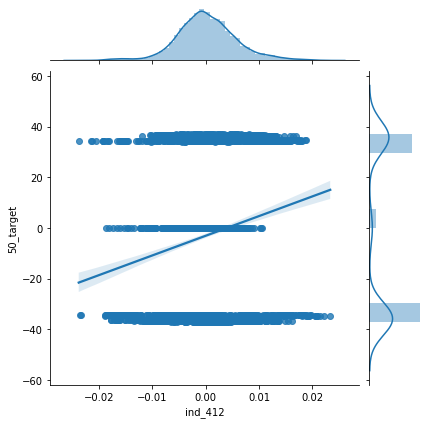

In [378]:
sns.jointplot(x = "ind_412",y = "50_target",data = dfx , kind="reg")

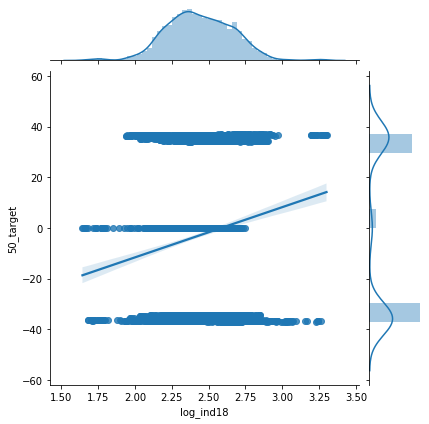

In [110]:
sns.jointplot(x = "log_ind18",y = "50_target",data = dfx , kind="reg")

In [379]:
import scipy.stats as stats
import pylab

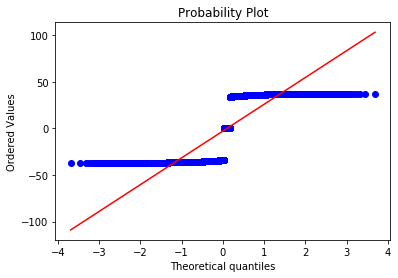

In [380]:
stats.probplot(dfx["50_target"],dist = "norm",plot = pylab)
pylab.show()

In [381]:
dfx['50_target'].isnull().sum()

0

In [48]:
#df['logtarget90'] = df['logtarget90'].dropna(how=any)

In [113]:
dfx['50_target'].head()

0    35.625252
1    35.643013
2    35.651301
3     0.000000
4   -35.727079
Name: 50_target, dtype: float64

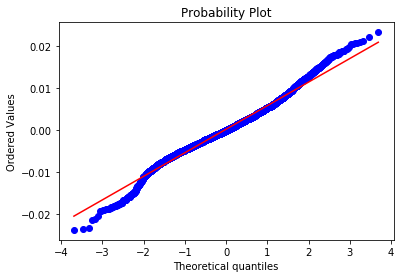

In [382]:
stats.probplot(dfx["ind_412"],dist = "norm",plot = pylab)
pylab.show()

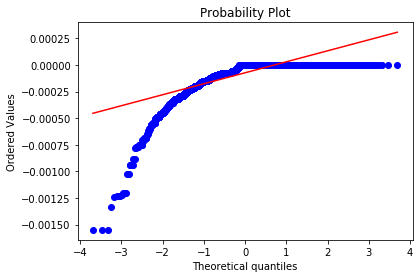

In [383]:
stats.probplot(dfx["ind_324"],dist = "norm",plot = pylab)
pylab.show()

In [384]:
import statsmodels.api as sm
X = dfx[["ind_412"]]
X[0:5]
X=sm.add_constant(X) # sabit bir değer atıyor , b0 olarak
X[0:5]

y = dfx["50_target"]
y[0:5]

0    35.625252
1    35.643013
2    35.651301
3     0.000000
4   -35.727079
Name: 50_target, dtype: float64

In [385]:
lm= sm.OLS(y,X) # noralite varsayımına gerek duymmadığı için kullnmması daha rahat.
model = lm.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              50_target   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     101.4
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           1.12e-23
Time:                        14:57:32   Log-Likelihood:                -30548.
No. Observations:                6167   AIC:                         6.110e+04
Df Residuals:                    6165   BIC:                         6.111e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0803      0.437     -7.051      0.000      -3.937      -2.224
ind_412      776.9121     77.136     10.072      0.000     625.699     928.125
==============================================================================
Omnibus:                    23611.332   Durbin-Watson:                   0.303
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              899.472
Skew:                           0.149   Prob(JB):                    4.81e-196
Kurtosis:                       1.153   Cond. No.                         177.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
model.params

const       -51.303182
log_ind18    19.841738
dtype: float64

In [122]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-51.3032,4.778,-10.738,0.000,-60.669,-41.938
log_ind18,19.8417,1.951,10.173,0.000,16.018,23.665


In [123]:
print("f_value: ", "%.4f" %model.f_pvalue)
print("fvalue: ", "%.2f" %model.fvalue)
print("tvalue: ", "%.2f" %model.tvalues[0:1])

f_value:  0.0000
fvalue:  103.48
tvalue:  -10.74


In [124]:
model.rsquared_adj

0.016348837938481964

In [125]:
model.fittedvalues[0:5]

0   -7.465387
1   -7.221860
2   -7.029169
3   -6.811969
4   -5.830344
dtype: float64

In [126]:
y[0:5]

0    35.625252
1    35.643013
2    35.651301
3     0.000000
4   -35.727079
Name: 50_target, dtype: float64

In [127]:
print("50_target = "   + str("%2f" % model.params[0] + " + log_ind18" + "*" + str("%.2f"  %model.params[1])) )

50_target = -51.303182 + log_ind18*19.84


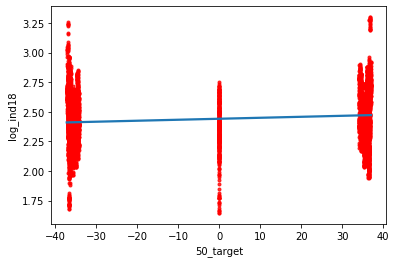

In [128]:
g = sns.regplot(dfx["50_target"] , dfx["log_ind18"] , ci=None , scatter_kws ={"color" : "r", "s":9})

In [129]:
from sklearn.linear_model import LinearRegression

In [131]:
X = dfx[["log_ind18"]]
y = dfx[["50_target"]]
reg = LinearRegression()

In [132]:
model = reg.fit(X,y)

In [133]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
model.intercept_

array([-51.30318192])

In [135]:
model.coef_

array([[19.84173836]])

In [136]:
model.score(X,y)

0.016508366184032064

In [137]:
model.predict(X)[0:10]

array([[-7.46538663],
       [-7.22186027],
       [-7.02916855],
       [-6.8119694 ],
       [-5.8303444 ],
       [-5.18895937],
       [-4.71405888],
       [-4.54884778],
       [-4.38500095],
       [-4.51596999]])

In [138]:
X = dfx[["log_ind18"]]
y = dfx[["50_target"]]
reg = LinearRegression()
model=reg.fit(X,y)
model.predict([[30]])

array([[543.94896894]])

In [91]:
yeni_veri = [[1],[90],[200]]
model.predict(yeni_veri)

array([[ -37.7621116 ],
       [2092.52511735],
       [4725.46438908]])

In [139]:
from sklearn.metrics import mean_squared_error , r2_score
import statsmodels.formula.api as smf

In [193]:
import statsmodels.api as sm
dfx.dropna(inplace=True)
X = dfx[["log_ind18"]]
X[0:5]
X=sm.add_constant(X) # sabit bir değer atıyor , b0 olarak
X[0:5]

y = dfx["50_target"]
y[0:5]

0    35.625252
1    35.643013
2    35.651301
3     0.000000
4   -35.727079
Name: 50_target, dtype: float64

In [194]:
lm= sm.OLS(y,X) # noralite varsayımına gerek duymmadığı için kullnmması daha rahat.
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              50_target   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     92.69
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           9.34e-22
Time:                        10:34:53   Log-Likelihood:                -25347.
No. Observations:                5126   AIC:                         5.070e+04
Df Residuals:                    5124   BIC:                         5.071e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -54.3119      5.296    -10.255      0.000     -64.695     -43.929
log_ind18     20.9632      2.177      9.628      0.000      16.695      25.232
==============================================================================
Omnibus:                    20141.103   Durbin-Watson:                   0.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              734.867
Skew:                           0.181   Prob(JB):                    2.66e-160
Kurtosis:                       1.181   Cond. No.                         31.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
mse = mean_squared_error(y , model.fittedvalues)

In [143]:
mse

1174.4705251544221

In [395]:
from sklearn.model_selection import train_test_split , cross_val_score, cross_val_predict
dfx.dropna(inplace=True)
X = dfx.drop(columns = ["50_target" , "ind_5" , "ind_42" , "ind_237", "ind_241","ind_315","ind_316","ind_311","ind_344","ind_340"])
y = dfx["50_target"]

X_train, X_test , y_train , y_test = train_test_split(X, y , test_size = 0.20 , random_state = 42)



# test yüzde 20 train 80

In [181]:
X_train.shape

(4933, 41)

In [391]:
X_train.isna().sum()

ind_5            0
ind_14           0
ind_18           0
ind_27           0
ind_42           0
ind_179          0
ind_217          0
ind_225          0
ind_228          0
ind_237          0
ind_239          0
ind_241          0
ind_309          0
ind_310          0
ind_311          0
ind_315          0
ind_316          0
ind_324          0
ind_327          0
ind_330          0
ind_334          0
ind_340          0
ind_344          0
ind_349          0
ind_412          0
ind_416          0
ind_420          0
ind_109_GREEN    0
ind_109_RED      0
dtype: int64

In [396]:
lm = sm.OLS(y_train , X_train)

In [397]:
model = lm.fit()

In [398]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              50_target   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     18.25
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           9.80e-60
Time:                        15:06:00   Log-Likelihood:                -24310.
No. Observations:                4933   AIC:                         4.866e+04
Df Residuals:                    4913   BIC:                         4.879e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
ind_14            0.2124      0.074      2.877      0.004       0.068       0.357
ind_18            1.2731      0.226      5.624      0.000       0.829       1.717
ind_27        -2339.9697    809.883     -2.889      0.004   -3927.703    -752.237
ind_179           0.0944      0.084      1.123      0.261      -0.070       0.259
ind_217           1.7338      0.552      3.143      0.002       0.652       2.815
ind_225        -129.3161     48.960     -2.641      0.008    -225.300     -33.332
ind_228          -2.2129      2.961     -0.747      0.455      -8.019       3.593
ind_239        1.604e+04   3749.820      4.279      0.000    8693.130    2.34e+04
ind_309        2.907e+04   7771.257      3.741      0.000    1.38e+04    4.43e+04
ind_310           3.6078      1.203      3.000      0.003       1.250       5.965
ind_324       -1.607e+04   4777.713     -3.364      0.001   -2.54e+04   -6704.114
ind_327          -0.0265      0.017     -1.567      0.117      -0.060       0.007
ind_330          -4.3309      1.223     -3.542      0.000      -6.728      -1.934
ind_334        2307.9053   7420.362      0.311      0.756   -1.22e+04    1.69e+04
ind_349       -1.423e+04   2.34e+04     -0.608      0.543   -6.01e+04    3.16e+04
ind_412         890.8382     95.035      9.374      0.000     704.527    1077.149
ind_416           0.2083      0.032      6.444      0.000       0.145       0.272
ind_420          -0.0175      0.005     -3.577      0.000      -0.027      -0.008
ind_109_GREEN   -16.6760      4.787     -3.483      0.000     -26.061      -7.291
ind_109_RED     -16.3517      4.782     -3.420      0.001     -25.726      -6.978
==============================================================================
Omnibus:                    22737.333   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              583.111
Skew:                           0.137   Prob(JB):                    2.39e-127
Kurtosis:                       1.338   Cond. No.                     5.52e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [215]:
from sklearn.model_selection import train_test_split , cross_val_score, cross_val_predict
dfx.dropna(inplace=True)
X = dfx.drop(columns = ["ind_309","ind_327","ind_179","ind_237","ind_349","ind_422","ind_42","50_target","ind_5","log_ind14","ind_403","ind_344","ind_316","ind_241","ind_228","ind_88","ind_8","ind_28"])
y = dfx["50_target"]

X_train, X_test , y_train , y_test = train_test_split(X, y , test_size = 0.20 , random_state = 42)
lm = sm.OLS(y_train , X_train)
model = lm.fit()

# test yüzde 20 train 80

In [216]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              50_target   R-squared (uncentered):                   0.091
Model:                            OLS   Adj. R-squared (uncentered):              0.085
Method:                 Least Squares   F-statistic:                              16.94
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                    1.63e-67
Time:                        10:53:12   Log-Likelihood:                         -20134.
No. Observations:                4100   AIC:                                  4.032e+04
Df Residuals:                    4076   BIC:                                  4.047e+04
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_9          0.0369      0.019      1.966      0.049       0.000       0.074
ind_14         0.3237      0.088      3.693      0.000       0.152       0.496
ind_18         1.6962      0.454      3.737      0.000       0.806       2.586
ind_27     -4929.2496   1098.212     -4.488      0.000   -7082.346   -2776.153
ind_29        -0.0138      0.007     -1.991      0.047      -0.027      -0.000
ind_40        -9.6083      3.220     -2.984      0.003     -15.921      -3.296
ind_164       -0.2826      0.075     -3.772      0.000      -0.429      -0.136
ind_172        0.0847      0.030      2.834      0.005       0.026       0.143
ind_176        0.0563      0.030      1.864      0.062      -0.003       0.115
ind_217        1.4165      0.586      2.419      0.016       0.268       2.564
ind_225     -176.1313     84.289     -2.090      0.037    -341.384     -10.878
ind_239     2.121e+04   3979.126      5.331      0.000    1.34e+04     2.9e+04
ind_310        5.5283      1.448      3.817      0.000       2.689       8.367
ind_311       -0.0372      0.027     -1.376      0.169      -0.090       0.016
ind_315       -2.7217      0.789     -3.448      0.001      -4.269      -1.174
ind_324     -2.39e+04   4613.349     -5.180      0.000   -3.29e+04   -1.49e+04
ind_330       -6.6940      2.628     -2.547      0.011     -11.846      -1.542
ind_334    -1.767e+04   9157.499     -1.929      0.054   -3.56e+04     286.013
ind_340       22.6052     10.052      2.249      0.025       2.899      42.312
ind_412      856.9944     98.605      8.691      0.000     663.674    1050.315
ind_416        0.1492      0.035      4.262      0.000       0.081       0.218
ind_420       -0.0164      0.005     -3.260      0.001      -0.026      -0.007
log_ind18    -10.7684      3.437     -3.133      0.002     -17.506      -4.030
log_ind40     25.9497     10.342      2.509      0.012       5.673      46.226
==============================================================================
Omnibus:                    20964.262   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              459.488
Skew:                           0.191   Prob(JB):                    1.67e-100
Kurtosis:                       1.405   Cond. No.                     2.35e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
std.fit(X_train.values)

## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X_tr = std.transform(X_train.values)


## Apply the scaler to the test set

X_te = std.transform(X_test.values)

## Note that even though we put a Pandas Dataframe into the scalar, what comes out is a numpy array
## In general, sklearn works on numpy.  It will accept pandas objects by trying to coerce them to numpy arrays
## But it will not usually output pandas objects

type(X_train), type(X_tr)

## Here we can plot histograms of the transformed variables
## Note that they seem to have means of 0 and stddevs of 1
## (though they are not necessarily normally distributed)

plt.hist(X_tr[:,3])

In [223]:
plt.hist(X_tr[:,3])

AttributeError: 'function' object has no attribute 'hist'

In [224]:
from sklearn.model_selection import train_test_split , cross_val_score, cross_val_predict
dfx.dropna(inplace=True)
X = dfx.drop(columns = ["ind_309","ind_327","ind_179","ind_237","ind_349","ind_422","ind_42","50_target","ind_5","log_ind14","ind_403","ind_344","ind_316","ind_241","ind_228","ind_88","ind_8","ind_28"])
y = dfx["50_target"]

X_tr, X_te , y_train , y_test = train_test_split(X, y , test_size = 0.20 , random_state = 42)
lm = sm.OLS(y_train , X_train)
model = lm.fit()


In [227]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              50_target   R-squared (uncentered):                   0.091
Model:                            OLS   Adj. R-squared (uncentered):              0.085
Method:                 Least Squares   F-statistic:                              16.94
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                    1.63e-67
Time:                        12:01:43   Log-Likelihood:                         -20134.
No. Observations:                4100   AIC:                                  4.032e+04
Df Residuals:                    4076   BIC:                                  4.047e+04
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_9          0.0369      0.019      1.966      0.049       0.000       0.074
ind_14         0.3237      0.088      3.693      0.000       0.152       0.496
ind_18         1.6962      0.454      3.737      0.000       0.806       2.586
ind_27     -4929.2496   1098.212     -4.488      0.000   -7082.346   -2776.153
ind_29        -0.0138      0.007     -1.991      0.047      -0.027      -0.000
ind_40        -9.6083      3.220     -2.984      0.003     -15.921      -3.296
ind_164       -0.2826      0.075     -3.772      0.000      -0.429      -0.136
ind_172        0.0847      0.030      2.834      0.005       0.026       0.143
ind_176        0.0563      0.030      1.864      0.062      -0.003       0.115
ind_217        1.4165      0.586      2.419      0.016       0.268       2.564
ind_225     -176.1313     84.289     -2.090      0.037    -341.384     -10.878
ind_239     2.121e+04   3979.126      5.331      0.000    1.34e+04     2.9e+04
ind_310        5.5283      1.448      3.817      0.000       2.689       8.367
ind_311       -0.0372      0.027     -1.376      0.169      -0.090       0.016
ind_315       -2.7217      0.789     -3.448      0.001      -4.269      -1.174
ind_324     -2.39e+04   4613.349     -5.180      0.000   -3.29e+04   -1.49e+04
ind_330       -6.6940      2.628     -2.547      0.011     -11.846      -1.542
ind_334    -1.767e+04   9157.499     -1.929      0.054   -3.56e+04     286.013
ind_340       22.6052     10.052      2.249      0.025       2.899      42.312
ind_412      856.9944     98.605      8.691      0.000     663.674    1050.315
ind_416        0.1492      0.035      4.262      0.000       0.081       0.218
ind_420       -0.0164      0.005     -3.260      0.001      -0.026      -0.007
log_ind18    -10.7684      3.437     -3.133      0.002     -17.506      -4.030
log_ind40     25.9497     10.342      2.509      0.012       5.673      46.226
==============================================================================
Omnibus:                    20964.262   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              459.488
Skew:                           0.191   Prob(JB):                    1.67e-100
Kurtosis:                       1.405   Cond. No.                     2.35e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [399]:
influence = model.get_influence()
influence

Leverage vs studentized residuals


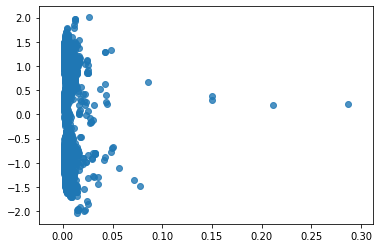

In [400]:
resid_student = influence.resid_studentized_external

(cooks, p) =influence.cooks_distance
(dffits,p) = influence.dffits
leverage = influence.hat_matrix_diag
print("Leverage vs studentized residuals")
sns.regplot(leverage , model.resid_pearson , fit_reg = False)

In [229]:
#lm = LinearRegression()
#model = lm.fit(X_train, y_train)
#model.score(X_train,y_train)

0.07887557888859065

AttributeError: 'function' object has no attribute 'show'

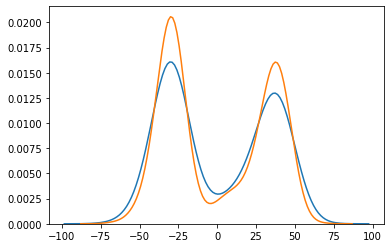

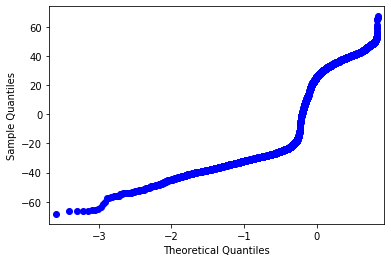

In [403]:
advres = pd.concat([dfx , pd.Series(model.resid, name = 'resid'), pd.Series(model.predict(), name = "predict")], axis = 1)

sns.kdeplot(np.array(advres.resid), bw=10)
sns.distplot(np.array(advres.resid), hist=False)

sm.qqplot(advres.resid)
plt.show()

C:\Users\HP\anaconda4\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\HP\anaconda4\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\HP\anaconda4\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


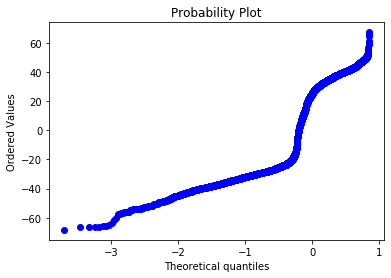

Hatalar Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)


C:\Users\HP\anaconda4\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [404]:
import pylab
stats.probplot(advres.resid, dist="norm", plot=pylab)
pylab.show()
from scipy.stats import shapiro

stat, p =shapiro(advres.resid)
alpha = 0.05
if p > alpha:
    print('Hatalar Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)')
else:
    print('Hatalar Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)')

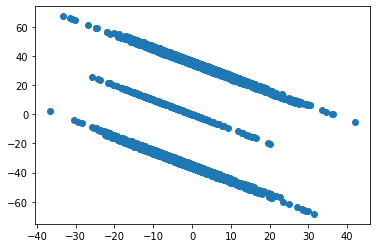

In [412]:
resid = model.resid
plt.scatter(model.predict() , resid)

mse = mean_squared_error(y, model.fittedvalues)

In [413]:
mse = mean_squared_error(y, model.fittedvalues)

ValueError: Found input variables with inconsistent numbers of samples: [6167, 4933]

In [51]:
X = dfx.drop(columns = ["50_target"])
y = dfx["50_target"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42 )
X_train.shape

(4625, 30)

In [53]:
pca = PCA()

In [54]:
X_reduced_train = pca.fit_transform(scale(X_train)) #scale sebebi normalizasyon yapmamız daha iyi olur pca yaparken
X_reduced_train[0:1, :] #yeni bir x dataseti veriyor reduced edilmiş

array([[-1.74938554e+00, -1.34685873e+00,  1.80614543e+00,
         1.21963261e+00, -1.47635823e+00, -1.84344758e-01,
         8.97115828e-01, -8.55078243e-01,  5.13833374e-01,
        -9.62226001e-01,  6.66313251e-01,  4.87373015e-02,
         4.78472972e-02,  5.65219800e-01,  7.95534620e-01,
        -3.84375650e-01, -1.00710686e-01,  4.24321236e-01,
         8.27363059e-01, -9.43228436e-01, -6.88927251e-01,
         7.64195876e-02,  1.98224402e-01, -1.25042508e+00,
        -1.13616954e+00, -2.46211122e-01, -3.99633754e-01,
        -6.20463394e-01, -6.27320993e-02,  1.49930499e-15]])

In [55]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals =4)*100)
#[0:5]

array([12.34, 22.73, 30.38, 37.55, 43.  , 47.71, 51.89, 55.95, 59.54,
       63.09, 66.47, 69.67, 72.73, 75.62, 78.42, 81.03, 83.45, 85.6 ,
       87.6 , 89.47, 91.09, 92.65, 94.17, 95.39, 96.6 , 97.57, 98.46,
       99.25, 99.98, 99.98])

([<matplotlib.axis.XTick at 0x9b47cd5fc8>,
 <a list of 30 Text xticklabel objects>)

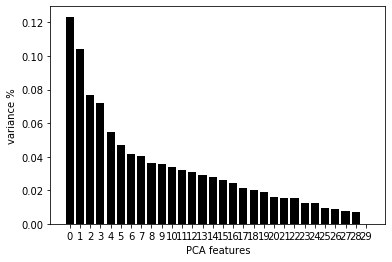

In [56]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)


In [57]:
from sklearn.linear_model import LinearRegression
pca = PCA(n_components=10)
X_reduced_train = pca.fit_transform(scale(X_train))
lm= LinearRegression()
pcr_model = lm.fit(X_reduced_train , y_train)

In [58]:
pcr_model.intercept_

-2.911841468918919

In [59]:
pcr_model.coef_

array([ 2.10215105,  0.68724699, -0.22076896,  1.4779365 , -2.286106  ,
        0.39926838, -2.46146775,  0.28059089,  0.61029622, -0.17661746])

In [60]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[0:5]

array([ -4.80624037,  -5.36793162,  -6.93926317, -11.02434814,
        -0.82310456])

In [61]:
from sklearn.metrics import mean_squared_error,r2_score
np.sqrt(mean_squared_error(y_train, y_pred))

33.99055853691742

In [62]:
df['50_target'].mean()

-2.9063582899740608

In [63]:
r2_score(y_train, y_pred)

0.03309601698987685

Text(0, 0.5, 'PCA 2')

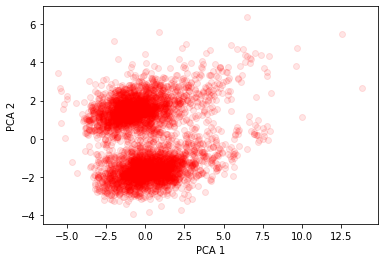

In [71]:
X_reduced_train = pca.fit_transform(scale(X_train))
PCA_components = pd.DataFrame(X_reduced_train)
plt.scatter(PCA_components[0] , PCA_components[1], alpha = .10 , color='red')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')